In [1]:
# (c) Charles Le Losq 2021
# see embedded licence file

%matplotlib inline

import numpy as np
import scipy, h5py, matplotlib, torch
import pandas as pd
import matplotlib.pyplot as plt

import imelt
device = torch.device('cpu')

import mpltern
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

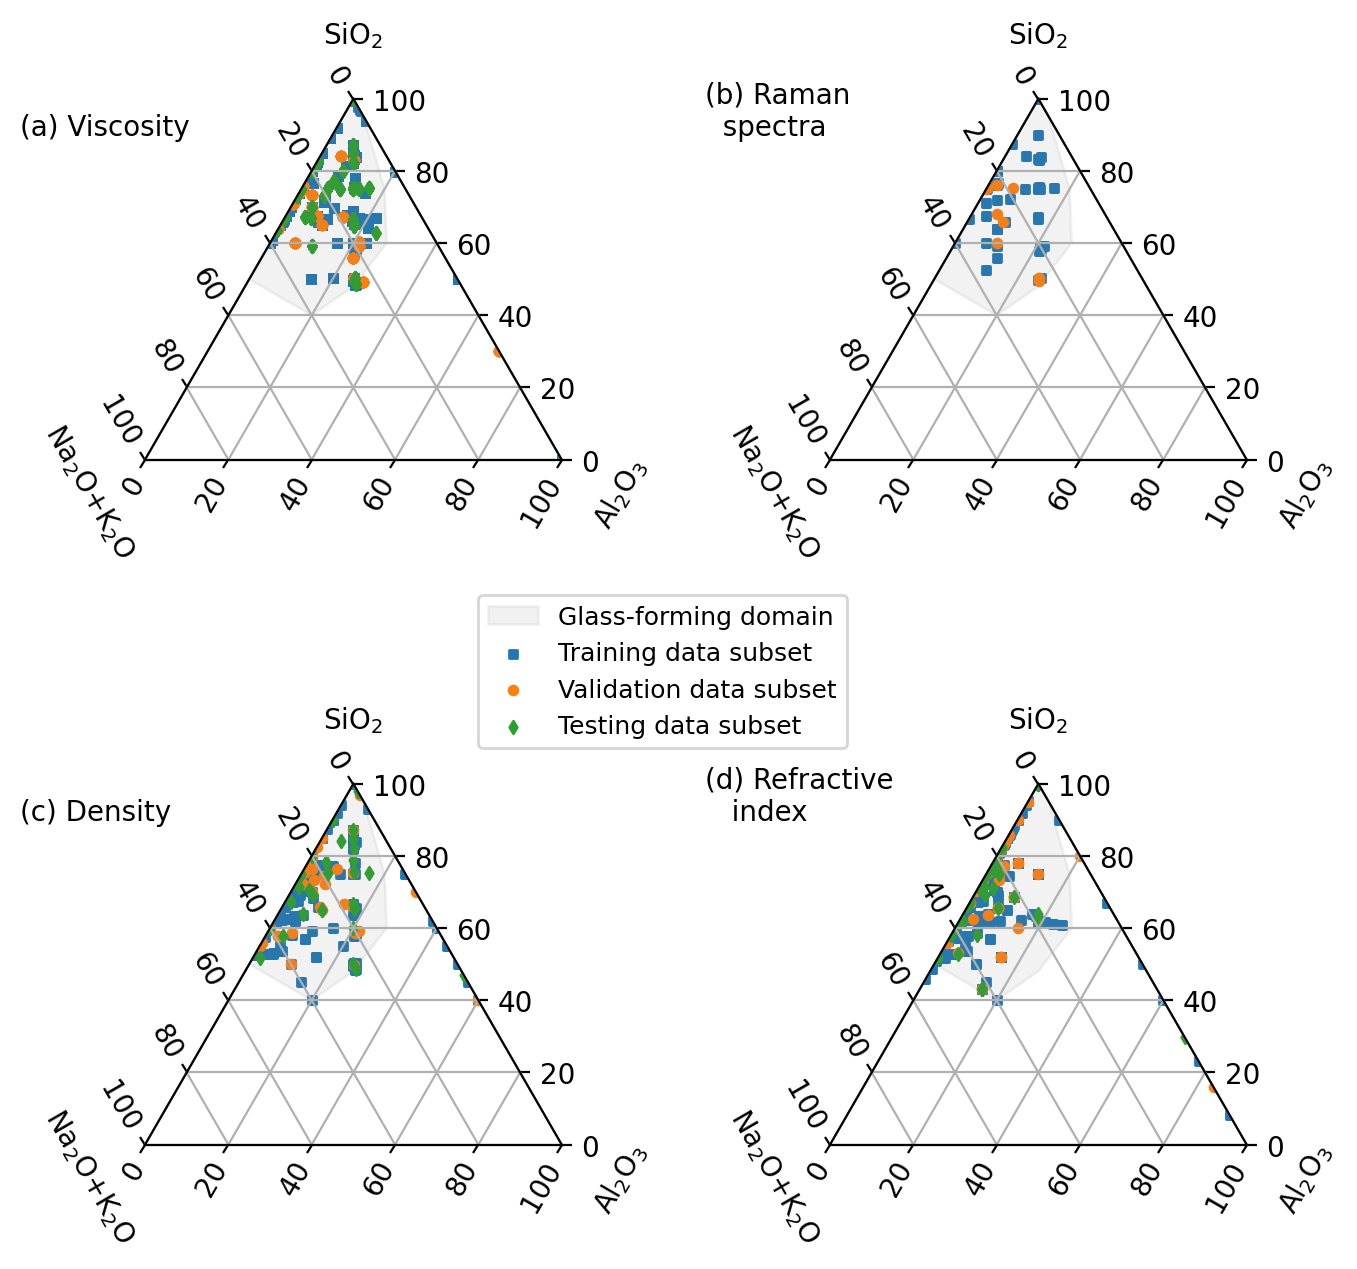

In [3]:
### Load dataset
ds = imelt.data_loader("./data/NKAS_viscosity_reference.hdf5",
                         "./data/NKAS_Raman.hdf5",
                         "./data/NKAS_density.hdf5",
                         "./data/NKAS_optical.hdf5",
                         device)

### Make Figure

figure = plt.figure(figsize=(7,7),dpi=200)

ax1 = plt.subplot(2,2,1,projection='ternary',ternary_scale=100)
ax2 = plt.subplot(2,2,2,projection='ternary',ternary_scale=100)
ax3 = plt.subplot(2,2,3,projection='ternary',ternary_scale=100)
ax4 = plt.subplot(2,2,4,projection='ternary',ternary_scale=100)

# The glass forming domain

t = [1.0, 0.5, 0.40, 0.48, 0.6, 0.75, 0.95]
l = [0.0, 0.5, 0.4, 0.26, 0.12, 0.05, 0.0]
r = [0.0, 0.0, 0.2, 0.26, 0.28, 0.2, 0.05]

ax1.fill(t, l, r, "",color="grey", alpha=0.1,label="Glass-forming domain")
ax2.fill(t, l, r, "",color="grey", alpha=0.1)
ax3.fill(t, l, r, "",color="grey", alpha=0.1)
ax4.fill(t, l, r, "",color="grey", alpha=0.1)

ax1.grid(axis='t')
ax1.grid(axis='l')
ax1.grid(axis='r')

ax2.grid(axis='t')
ax2.grid(axis='l')
ax2.grid(axis='r')

ax3.grid(axis='t')
ax3.grid(axis='l')
ax3.grid(axis='r')

ax4.grid(axis='t')
ax4.grid(axis='l')
ax4.grid(axis='r')

# The data
ax1.scatter(ds.x_visco_train.detach().numpy()[:,0], ds.x_visco_train.detach().numpy()[:,2:4].sum(axis=1), ds.x_visco_train.detach().numpy()[:,1],
            marker='s', s=10, color='C0', alpha=1., label="Training data subset")
ax1.scatter(ds.x_visco_valid.detach().numpy()[:,0], ds.x_visco_valid.detach().numpy()[:,2:4].sum(axis=1), ds.x_visco_valid.detach().numpy()[:,1],
            marker='o', s=10, color='C1', alpha=1., label="Validation data subset")
ax1.scatter(ds.x_visco_test.detach().numpy()[:,0], ds.x_visco_test.detach().numpy()[:,2:4].sum(axis=1), ds.x_visco_test.detach().numpy()[:,1],
            marker='d', s=10, color='C2', alpha=1., label="Testing data subset")

ax2.scatter(ds.x_raman_train.detach().numpy()[:,0], ds.x_raman_train.detach().numpy()[:,2:4].sum(axis=1), ds.x_raman_train.detach().numpy()[:,1],
            marker='s', s=10, color='C0', alpha=1., label="Train")
ax2.scatter(ds.x_raman_valid.detach().numpy()[:,0], ds.x_raman_valid.detach().numpy()[:,2:4].sum(axis=1), ds.x_raman_valid.detach().numpy()[:,1],
            marker='o', s=10, color='C1', alpha=1., label="Valid")

ax3.scatter(ds.x_density_train.detach().numpy()[:,0], ds.x_density_train.detach().numpy()[:,2:4].sum(axis=1), ds.x_density_train.detach().numpy()[:,1],
            marker='s', s=10, color='C0', alpha=1., label="Train")
ax3.scatter(ds.x_density_valid.detach().numpy()[:,0], ds.x_density_valid.detach().numpy()[:,2:4].sum(axis=1), ds.x_density_valid.detach().numpy()[:,1],
            marker='o', s=10, color='C1', alpha=1., label="Valid")
ax3.scatter(ds.x_density_test.detach().numpy()[:,0], ds.x_density_test.detach().numpy()[:,2:4].sum(axis=1), ds.x_density_test.detach().numpy()[:,1],
            marker='d', s=10, color='C2', alpha=1., label="Test")

ax4.scatter(ds.x_ri_train.detach().numpy()[:,0], ds.x_ri_train.detach().numpy()[:,2:4].sum(axis=1), ds.x_ri_train.detach().numpy()[:,1],
            marker='s', s=10, color='C0', alpha=1., label="Train")
ax4.scatter(ds.x_ri_valid.detach().numpy()[:,0], ds.x_ri_valid.detach().numpy()[:,2:4].sum(axis=1), ds.x_ri_valid.detach().numpy()[:,1],
            marker='o', s=10, color='C1', alpha=1., label="Valid")
ax4.scatter(ds.x_ri_test.detach().numpy()[:,0], ds.x_ri_test.detach().numpy()[:,2:4].sum(axis=1), ds.x_ri_test.detach().numpy()[:,1],
            marker='d', s=10, color='C2', alpha=1., label="Test")

ax1.set_tlabel('SiO$_2$')
ax1.set_llabel('Na$_2$O+K$_2$O')
ax1.set_rlabel('Al$_2$O$_3$')

ax2.set_tlabel('SiO$_2$')
ax2.set_llabel('Na$_2$O+K$_2$O')
ax2.set_rlabel('Al$_2$O$_3$')

ax3.set_tlabel('SiO$_2$')
ax3.set_llabel('Na$_2$O+K$_2$O')
ax3.set_rlabel('Al$_2$O$_3$')

ax4.set_tlabel('SiO$_2$')
ax4.set_llabel('Na$_2$O+K$_2$O')
ax4.set_rlabel('Al$_2$O$_3$')

ax1.annotate("(a) Viscosity",xy=(-0.3,0.9),xycoords="axes fraction")
ax2.annotate("(b) Raman \n  spectra",xy=(-0.3,0.9),xycoords="axes fraction")
ax3.annotate("(c) Density",xy=(-0.3,0.9),xycoords="axes fraction")
ax4.annotate("(d) Refractive \n   index",xy=(-0.3,0.9),xycoords="axes fraction")

plt.tight_layout()

ax1.legend(loc=(.8,-0.8),fontsize=9)

plt.savefig("./figures/Figure1_TernaryData.pdf")